In [5]:
!pip install python-mnist

In [9]:
%tensorflow_version 2.x

# use this to work with tensorflow 2.x on colab

UsageError: Line magic function `%tensorflow_version` not found.


In [11]:
!wget https://www.dropbox.com/s/y54njjo7w117bon/mnist_data.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [10]:
!unzip mnist_data

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
from mnist import MNIST
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

mndata = MNIST("D:\mnist_data")#dic path

In [14]:
images_train, labels_train = mndata.load_training()#len(images_train)
images_test,labels_test=mndata.load_testing()#len(images_test)

In [15]:
labels_train=np.array(labels_train).reshape(-1,1)
labels_test=np.array(labels_test).reshape(-1,1)

In [16]:
onehot=OneHotEncoder()

onehot.fit(labels_train)

labels_train=onehot.transform(labels_train)
labels_test=onehot.transform(labels_test)
labels_train=labels_train.toarray()
labels_test=labels_test.toarray()

In [17]:
images_train=np.array(images_train).reshape(60000,784)/255 #(normalization)converting all data to 255
images_test=np.array(images_test).reshape(10000,784)/255

In [18]:
images_train=images_train.reshape(60000,  28, 28,1).astype('float32')
images_test=images_test.reshape(10000, 28, 28,1).astype('float32')

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [ ]:
# Sequential API 

In [21]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=( 28, 28,1), activation='relu',
                 padding='same'))#( 28, 28,1)3d image

model.add(MaxPooling2D(pool_size=(2, 2)))#we can change the pool size(to parameter data in pool layer)

model.add(Conv2D(64, (5, 5),activation='relu',padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(200, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))#digits are btw 0 to 9 , dense 10,(10nodes) softmax activation
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])#model.compile just train the model not 

In [ ]:
# Functional API

In [50]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0     

In [22]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [23]:


image=Input(shape=(28,28,1))

conv1=Conv2D(32, (5, 5), activation='relu',padding='same')(image)
pool1=MaxPooling2D(pool_size=(2, 2))(conv1)

conv2=Conv2D(64, (5, 5),activation='relu',padding='same')(pool1)
pool2=MaxPooling2D(pool_size=(2, 2))(conv2)

flat_layer=Flatten()(pool2)

dense1=Dense(1024, activation='relu')(flat_layer)
drop1=Dropout(0.2)(dense1)

dense2=Dense(200, activation='relu')(drop1)
drop2=Dropout(0.2)(dense2)

output=Dense(10, activation='softmax')(drop2)

model=Model(inputs=image,outputs=output)

In [24]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0     

In [25]:
from tensorflow.keras.utils import plot_model

In [26]:
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [27]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
model.fit(images_train,labels_train,validation_data=[images_test,labels_test],
         epochs=30,batch_size=50,verbose=1)

In [ ]:
# Saving the model 

In [29]:
from tensorflow.keras.models import model_from_json

In [30]:
model_json = model.to_json()

In [31]:
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [32]:
model.save_weights("model.h5")

In [ ]:
# loading the model 

In [33]:
from tensorflow.keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [34]:
loaded_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0     

In [35]:
loaded_model.load_weights("model.h5")

In [ ]:
# make prediction 

In [36]:
p=loaded_model.predict(images_test)

313/313 [==============================] - 6s 19ms/step


In [37]:
labels_test_predicted=np.argmax(p,1)

In [38]:
# first argument to pd.crosstab goes to rows, second to columns
# row_0 : real labels
# col_0 : predicted labels
pd.crosstab(np.argmax(labels_test,axis=1),labels_test_predicted)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,972,0,0,0,0,0,6,1,1,0
1,0,1119,2,2,1,1,5,1,4,0
2,0,0,1022,1,2,0,0,2,5,0
3,0,0,0,1004,0,4,0,0,2,0
4,0,1,0,0,974,0,0,0,3,4
5,0,0,0,3,0,882,6,0,0,1
6,0,1,0,0,1,1,954,0,1,0
7,0,1,10,5,0,0,0,1009,1,2
8,1,0,1,4,0,1,3,0,964,0


In [39]:
y_true=np.argmax(labels_test,axis=1)

In [40]:
labels_test_predicted

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [41]:
(y_true==labels_test_predicted).sum()

9868

In [42]:
a=y_true==labels_test_predicted

In [43]:
c=[i for i,j in enumerate(a) if not j]

In [44]:
c

[73,
 92,
 320,
 449,
 495,
 551,
 582,
 619,
 646,
 684,
 813,
 938,
 1039,
 1224,
 1226,
 1232,
 1247,
 1290,
 1319,
 1378,
 1414,
 1425,
 1447,
 1459,
 1522,
 1527,
 1621,
 1709,
 1737,
 1754,
 1790,
 1878,
 1901,
 2018,
 2043,
 2129,
 2130,
 2182,
 2189,
 2369,
 2406,
 2414,
 2454,
 2462,
 2582,
 2597,
 2630,
 2654,
 2720,
 2760,
 2854,
 2863,
 2896,
 2915,
 2939,
 3073,
 3225,
 3520,
 3534,
 3601,
 3626,
 3767,
 3794,
 3808,
 3856,
 3869,
 3906,
 3985,
 4078,
 4163,
 4176,
 4201,
 4224,
 4238,
 4259,
 4284,
 4369,
 4505,
 4571,
 4740,
 4761,
 4763,
 4807,
 4823,
 4837,
 5067,
 5165,
 5201,
 5268,
 5331,
 5973,
 5997,
 6091,
 6166,
 6173,
 6560,
 6571,
 6572,
 6576,
 6597,
 6651,
 6783,
 7216,
 7354,
 7434,
 7574,
 7847,
 7856,
 7899,
 7928,
 8094,
 8128,
 8316,
 8325,
 8408,
 8519,
 8527,
 9009,
 9015,
 9019,
 9024,
 9517,
 9634,
 9642,
 9664,
 9692,
 9700,
 9729,
 9733,
 9749,
 9770,
 9904]

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

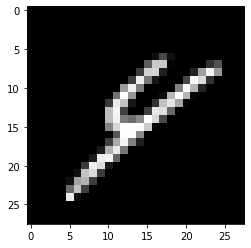

real label: 4
predicted label: 8


In [46]:
ind=7434
sample_image = images_test[ind,:,:,:] 
# sample_image = np.array(sample_image, dtype='float')
pixels = sample_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
print('real label:',np.argmax(labels_test[ind]))
print('predicted label:',labels_test_predicted[ind])

In [ ]:
# you can make prediction directly but if you want to further train from here 
# you'll have to compile the loaded model again 

In [48]:
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [51]:
loaded_model.fit(images_train,labels_train,validation_data=[images_test,labels_test],
         epochs=30,batch_size=50,verbose=1)

Epoch 1/30
1200/1200 [==============================] - 169s 141ms/step - loss: 0.0191 - accuracy: 0.9942 - val_loss: 0.0281 - val_accuracy: 0.9912
Epoch 2/30
1200/1200 [==============================] - 153s 127ms/step - loss: 0.0147 - accuracy: 0.9957 - val_loss: 0.0359 - val_accuracy: 0.9911
Epoch 3/30
1200/1200 [==============================] - 172s 143ms/step - loss: 0.0137 - accuracy: 0.9962 - val_loss: 0.0656 - val_accuracy: 0.9844
Epoch 4/30
1200/1200 [==============================] - 185s 154ms/step - loss: 0.0133 - accuracy: 0.9959 - val_loss: 0.0297 - val_accuracy: 0.9931
Epoch 5/30
1200/1200 [==============================] - 162s 135ms/step - loss: 0.0097 - accuracy: 0.9970 - val_loss: 0.0359 - val_accuracy: 0.9920
Epoch 6/30
1200/1200 [==============================] - 162s 135ms/step - loss: 0.0093 - accuracy: 0.9972 - val_loss: 0.0441 - val_accuracy: 0.9903
Epoch 7/30
1200/1200 [==============================] - 159s 132ms/step - loss: 0.0112 - accuracy: 0.9971 - val_

KeyboardInterrupt: 